In [2]:
library(class)
library(caret)   #contains a set of functions that can perform data pre-processing, feature selection, model tuning and etc. 
library(corrplot)    
library(ggplot2) #Used for exploratory data analysis (creating graphs)
library(tidyverse) 

# Data Import

In [3]:
setwd("C:/Users/janna/Downloads")
heart <- read.csv("heart (1).csv")
dim(heart) #returns dimension
str(heart) #structure of data frame

#copy of data set, Original
heart_Original <- heart
heart_Original

[1] 918  12

'data.frame':	918 obs. of  12 variables:
 $ Age           : int  40 49 37 48 54 39 45 54 37 48 ...
 $ Sex           : chr  "M" "F" "M" "F" ...
 $ ChestPainType : chr  "ATA" "NAP" "ATA" "ASY" ...
 $ RestingBP     : int  140 160 130 138 150 120 130 110 140 120 ...
 $ Cholesterol   : int  289 180 283 214 195 339 237 208 207 284 ...
 $ FastingBS     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ RestingECG    : chr  "Normal" "Normal" "ST" "Normal" ...
 $ MaxHR         : int  172 156 98 108 122 170 170 142 130 120 ...
 $ ExerciseAngina: chr  "N" "N" "N" "Y" ...
 $ Oldpeak       : num  0 1 0 1.5 0 0 0 0 1.5 0 ...
 $ ST_Slope      : chr  "Up" "Flat" "Up" "Flat" ...
 $ HeartDisease  : int  0 1 0 1 0 0 0 0 1 0 ...


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1


# Data Cleaning/Preparation 

In [4]:
is.null(heart)        #Check if data frame is NULL
colSums(is.na(heart)) #Check for the number of missing values in data frame

#Convert the features to an appropriate data type.
heart$Sex <- ifelse(heart$Sex == "M", 1, 0)  #Convert it into a numerical dummy variable

heart$ChestPainType <- as.factor(heart$ChestPainType)
heart$ChestPainType <- as.numeric(heart$ChestPainType)

heart$RestingECG <- as.factor(heart$RestingECG)
heart$RestingECG <- as.numeric(heart$RestingECG)

heart$ExerciseAngina <- ifelse(heart$ExerciseAngina == "Y", 1, 0)  #convert it into a numerical dummy variable

heart$ST_Slope <- as.factor(heart$ST_Slope)
heart$ST_Slope <- as.numeric(heart$ST_Slope)

heart$HeartDisease <- as.factor(heart$HeartDisease)
str(heart) #structure of data frame - Quantitative


[1] FALSE

Age            Sex  ChestPainType      RestingBP    Cholesterol 
             0              0              0              0              0 
     FastingBS     RestingECG          MaxHR ExerciseAngina        Oldpeak 
             0              0              0              0              0 
      ST_Slope   HeartDisease 
             0              0

'data.frame':	918 obs. of  12 variables:
 $ Age           : int  40 49 37 48 54 39 45 54 37 48 ...
 $ Sex           : num  1 0 1 0 1 1 0 1 1 0 ...
 $ ChestPainType : num  2 3 2 1 3 3 2 2 1 2 ...
 $ RestingBP     : int  140 160 130 138 150 120 130 110 140 120 ...
 $ Cholesterol   : int  289 180 283 214 195 339 237 208 207 284 ...
 $ FastingBS     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ RestingECG    : num  2 2 3 2 2 2 2 2 2 2 ...
 $ MaxHR         : int  172 156 98 108 122 170 170 142 130 120 ...
 $ ExerciseAngina: num  0 0 0 1 0 0 0 0 1 0 ...
 $ Oldpeak       : num  0 1 0 1.5 0 0 0 0 1.5 0 ...
 $ ST_Slope      : num  3 2 3 2 3 3 3 3 2 3 ...
 $ HeartDisease  : Factor w/ 2 levels "0","1": 1 2 1 2 1 1 1 1 2 1 ...


# Data normalization

Before beginning the KNN process, we must evaluate and process the data variables. I start off by checking if there are any missing values in the data frame, which there aren't any. Since the dataset consists of both numerical and categorical variables, we will convert the features to an appropriate data type (prefer quantitative for modeling). The data is essentially composed of a dependent variable (HeartDisease) and remaining eleven variables are independent; amongst them there are five qualitative variables (sex, chest pain type, resting
electrocardiogram results, exercise angina, and ST slope) and six qualitative (age, resting blood pressure, cholesterol, fasting blood sugar, maximum heart rate, and oldpeak). The target variable (HeartDisease) indicates whether the individual has heart disease. Upon examining our exploratory data analysis, we plan to use every single variable/predictor involved since each one is substantial when predicting the likelihood of getting heart disease. 

To ensure that the data is not affected by different lengths or measurements, which may skew our analysis, we must normalize our dataset. Our algorithm will be affected by our dataset if variant lengths/measurements are not normalized. The function used to normalize our dataset is presented below:

In [5]:
#Data normalization - So output remains unbiased and data is not affected by different length/measurement
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

#Test normalization function - result should be identical
normalize(c(1, 2, 3, 4, 5))
normalize(c(10, 20, 30, 40, 50))

#Apply normalize function to data; large range turn into 0-1
heart[1:11] <- as.data.frame(lapply(heart[1:11], normalize))

summary(heart)


[1] 0.00 0.25 0.50 0.75 1.00

[1] 0.00 0.25 0.50 0.75 1.00

      Age              Sex         ChestPainType      RestingBP    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.3878   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.600  
 Median :0.5306   Median :1.0000   Median :0.0000   Median :0.650  
 Mean   :0.5206   Mean   :0.7898   Mean   :0.2603   Mean   :0.662  
 3rd Qu.:0.6531   3rd Qu.:1.0000   3rd Qu.:0.6667   3rd Qu.:0.700  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.000  
  Cholesterol       FastingBS        RestingECG         MaxHR       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2873   1st Qu.:0.0000   1st Qu.:0.5000   1st Qu.:0.4225  
 Median :0.3698   Median :0.0000   Median :0.5000   Median :0.5493  
 Mean   :0.3297   Mean   :0.2331   Mean   :0.4946   Mean   :0.5409  
 3rd Qu.:0.4428   3rd Qu.:0.0000   3rd Qu.:0.5000   3rd Qu.:0.6761  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 ExerciseAngina      Oldpeak          ST_

# Exploratory Data analysis 

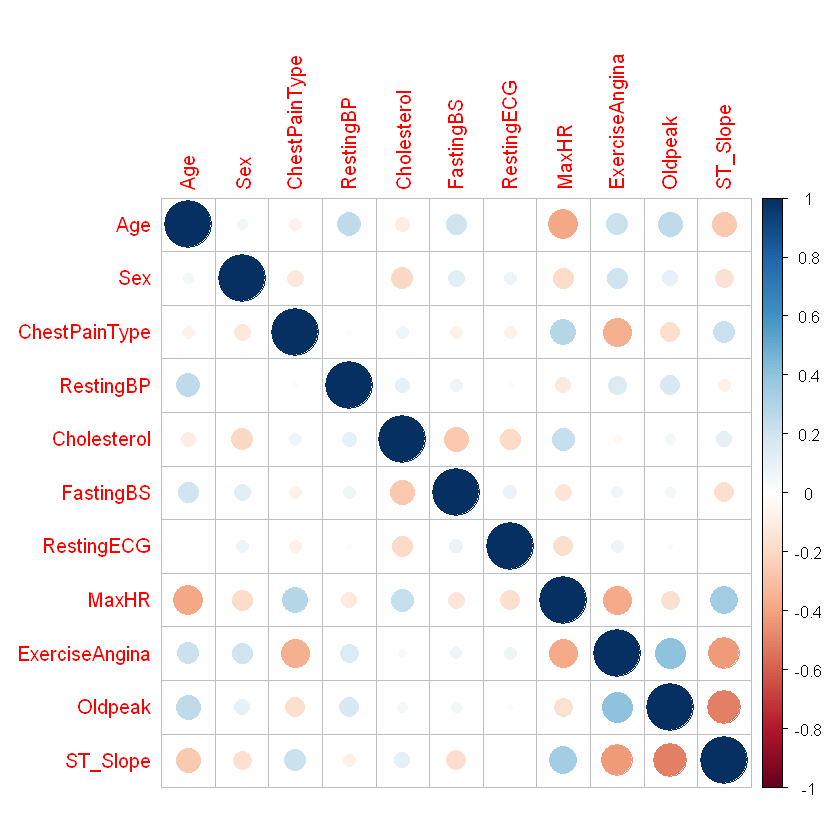

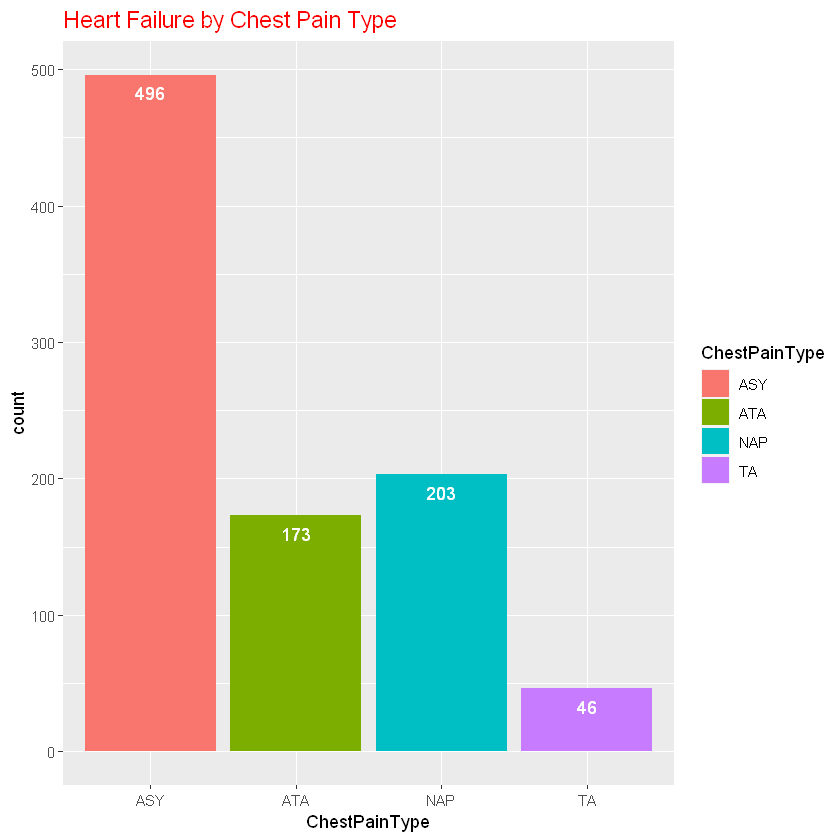

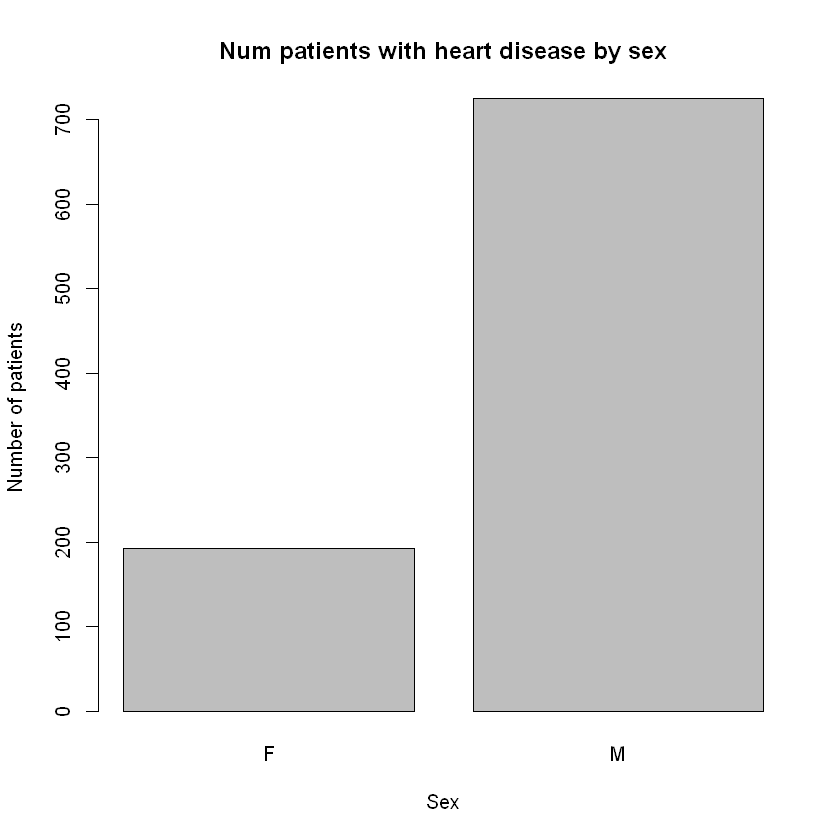

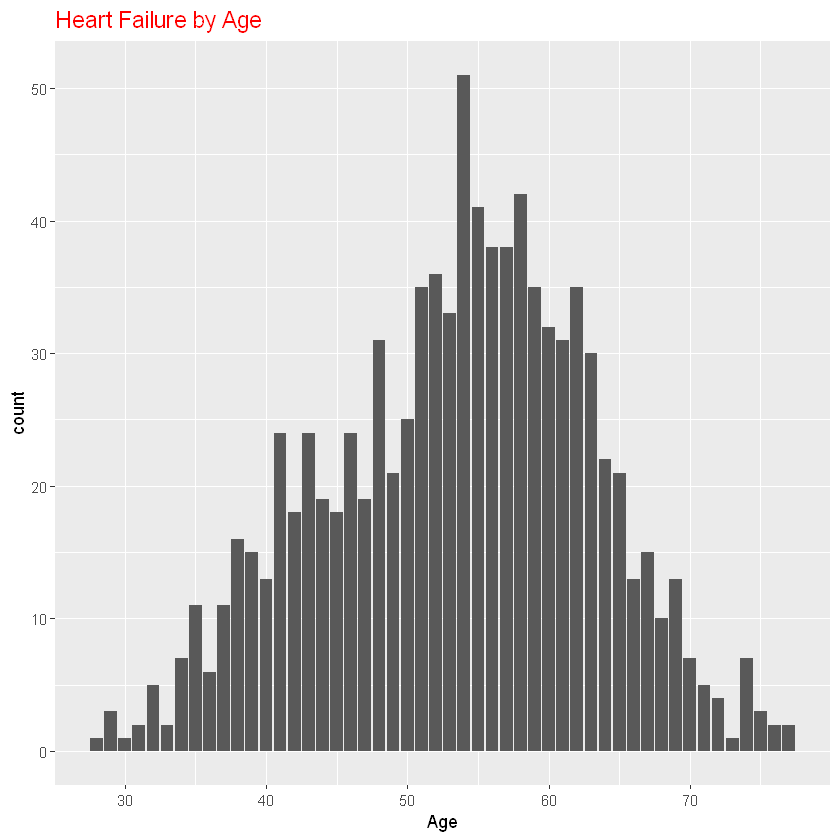

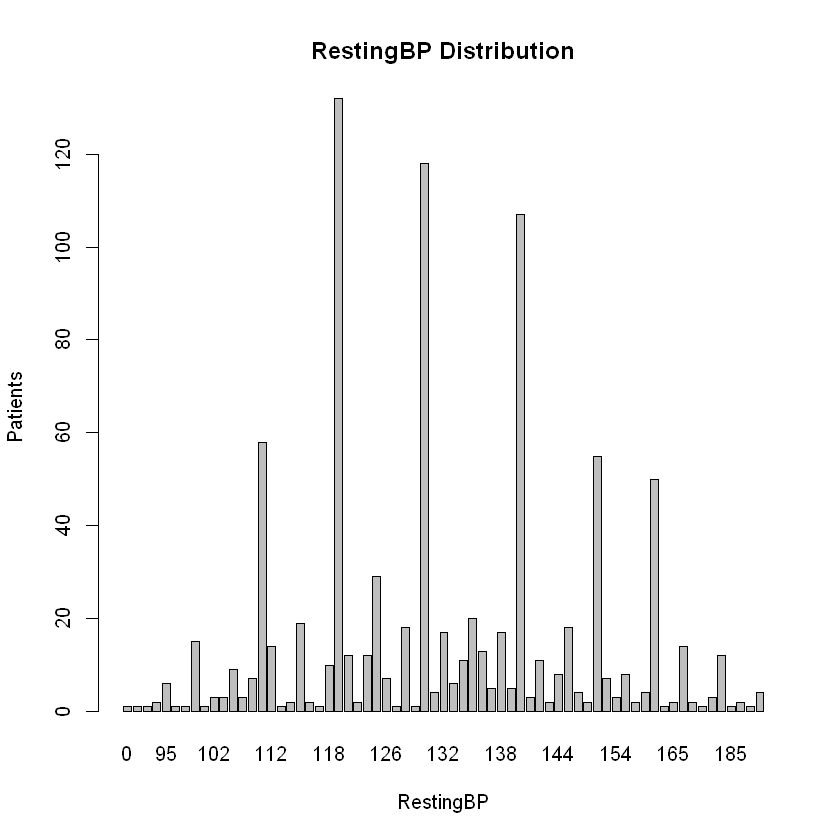

In [6]:
corrplot(cor(heart[-12]), method="circle")  
#The blue circles represent strong correlation between the two variable, while red circles represent low correlation - meaning they are hardly related
#Positive 1 represents "positive" 100% correlation (if one variable increase/decrease, so will the other variable)
#Negative 1 represents "negative" 100% correlation (if one variable increase, the other will decrease and vise versa)
#Age and RestingBP shows a stronger (positive) correlation opposed to Age and MaxHR, which shows a negative correlation

#use original data set because we want to see the types of Chest pain (in terms of qualitative data)
ggplot(heart_Original, aes(x=ChestPainType, fill=ChestPainType)) + 
  geom_bar() + 
  geom_text(stat='count', aes(label=after_stat(count)), vjust=1.75, colour = "white") +
  labs(title="Heart Failure by Chest Pain Type") + 
  theme(plot.title = element_text(size=14, color = "red"))
#Based on the diagram we can state that most patients do not feel chest pain (no symptoms in chest) - shown by ASY (496)
#Least amount of patients endured TA - substernal chest pain precipitated by physical exertion or emotional stress & relieved with rest/nitroglycerin

counts <- table(heart_Original$Sex)
barplot(counts, main="Num patients with heart disease by sex",
        xlab="Sex", ylab="Number of patients")
#Vast number of MALE patients have heart disease; also roughly 79% of the patients are male. Male patients is nearly triple in size opposed to female patients.

ggplot(heart_Original, aes(x=Age)) + 
  geom_bar() + 
  labs(title="Heart Failure by Age") + 
  theme(plot.title = element_text(size=14, color = "red"))
#Based on this graph, we can determine which age group experienced more heart failures.
#Heart Failure is very common in the seniors which is composed of age group 50 to 65.
#Heart failure is less among age group 0 to early 30 and late 70 - meaning greater than 70

counts <- table(heart_Original$RestingBP)
barplot(counts, main="RestingBP Distribution" ,
        xlab="RestingBP", ylab="Patients")
#We can conclude that majority of the patients experience heart failure when RestingBP was between 120 to 140 
#So patients are at high risk of heart disease if resting Blood Pressure is 120 or higher


# BEGIN KNN MODELING

We perform data splicing, where we randomly split our dataset to begin the Validation Set Approach (80% for training, and 20% for testing). This enables our model to predict responses from our test set and evaluate our model's accuracy depending on the K value. Below is the code that is used to split our dataset:

[1] 0.201087

0   1 
 72 112

[1] 1
[1] 0.1741573


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4675676


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 2
[1] 0.2486486


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4624829


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 3
[1] 0.1925134


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4705882


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 4
[1] 0.1912568


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4653061


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 5
[1] 0.155914


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4713115


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 6
[1] 0.1505376


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4849727


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 7
[1] 0.1803279


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4707483


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 8
[1] 0.1344086


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4918033


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 9
[1] 0.1016043


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4787962


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 10
[1] 0.1530055


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.477551


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 11
[1] 0.1675676


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4611187


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 12
[1] 0.147541


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4748299


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 13
[1] 0.1584699


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4517007


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 14
[1] 0.1311475


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4748299


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 15
[1] 0.1420765


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4748299


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 16
[1] 0.1530055


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.477551


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 17
[1] 0.1648352


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4918478


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 18
[1] 0.1420765


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.477551


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 19
[1] 0.1420765


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.462585


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 20
[1] 0.1593407


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4769022


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 21
[1] 0.1153846


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4728261


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 22
[1] 0.1657459


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4789688


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 23
[1] 0.1521739


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.5340599


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 24
[1] 0.15


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4810298


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 25
[1] 0.2209945


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4966079


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 26
[1] 0.1546961


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4871099


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 27
[1] 0.1657459


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.5006784


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 28
[1] 0.2166667


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4945799


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 29
[1] 0.1703297


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4741848


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 30
[1] 0.1277778


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.5108401


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 31
[1] 0.2154696


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4871099


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 32
[1] 0.2055556


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4742547


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 33
[1] 0.1555556


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4864499


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 34
[1] 0.1944444


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4878049


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 35
[1] 0.1333333


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4878049


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 36
[1] 0.2067039


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4722598


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 37
[1] 0.2122905


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4722598


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 38
[1] 0.1620112


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4695535


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 39
[1] 0.2055556


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4796748


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 40
[1] 0.1933702


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4708277


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 41
[1] 0.1620112


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4898512


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 42
[1] 0.1966292


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4608108


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 43
[1] 0.150838


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4925575


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 44
[1] 0.2022472


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4608108


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 45
[1] 0.2


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4823848


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 46
[1] 0.2078652


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4608108


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 47
[1] 0.1843575


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4722598


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 48
[1] 0.2191011


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4648649


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 49
[1] 0.1620112


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4763194


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 50
[1] 0.1564246


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.4776725


Warning message in `!=.default`(knn.pred, train$HeartDisease):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.1016043

[1] 9

[1] 0.4517007

[1] 13

[1] 9

Confusion Matrix and Statistics

        
knn.pred  0  1
       0 66 11
       1 17 85
                                          
               Accuracy : 0.8436          
                 95% CI : (0.7819, 0.8935)
    No Information Rate : 0.5363          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6839          
                                          
 Mcnemar's Test P-Value : 0.3447          
                                          
            Sensitivity : 0.7952          
            Specificity : 0.8854          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.8333          
             Prevalence : 0.4637          
         Detection Rate : 0.3687          
   Detection Prevalence : 0.4302          
      Balanced Accuracy : 0.8403          
                                          
       'Positive' Class : 0               
                                          

Confusion Matrix and Statistics

        
knn.pred   0   1
       0 336  40
       1  74 468
                                          
               Accuracy : 0.8758          
                 95% CI : (0.8527, 0.8965)
    No Information Rate : 0.5534          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7467          
                                          
 Mcnemar's Test P-Value : 0.001997        
                                          
            Sensitivity : 0.8195          
            Specificity : 0.9213          
         Pos Pred Value : 0.8936          
         Neg Pred Value : 0.8635          
             Prevalence : 0.4466          
         Detection Rate : 0.3660          
   Detection Prevalence : 0.4096          
      Balanced Accuracy : 0.8704          
                                          
       'Positive' Class : 0               
                                          

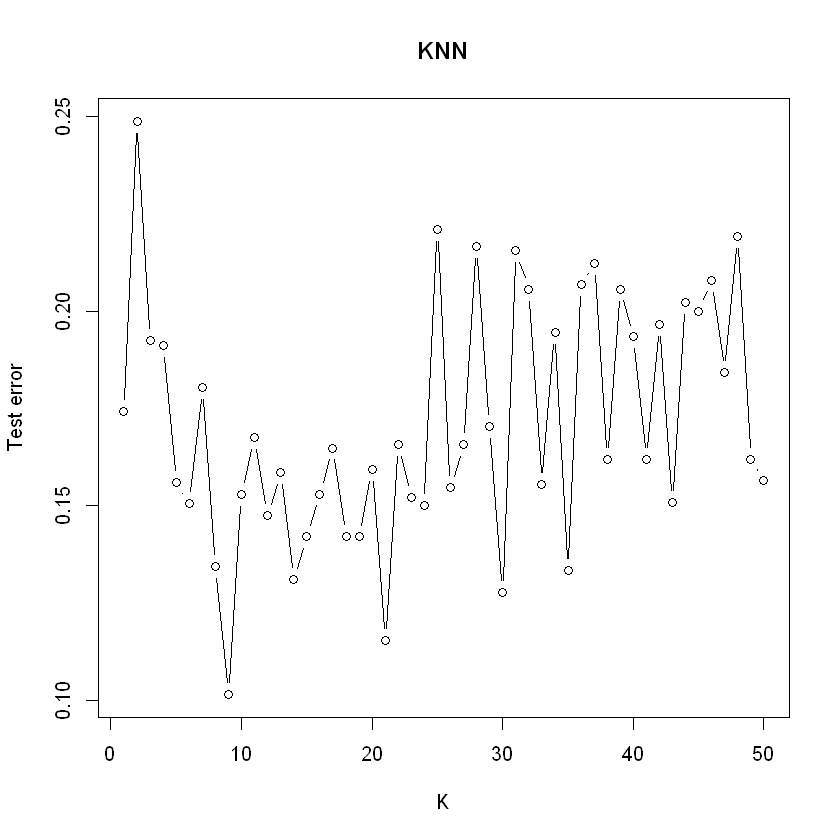

In [8]:
#Data Modeling   

#Data Splicing -> 80% train, 20% test
ind <- sample(2, nrow(heart), replace=TRUE, prob=c(0.8, 0.2))
train <- heart[ind==1,]
test <- heart[ind==2,]

#knn -> k=1 just to see
set.seed(1)
pred1 <- knn(train = train[1:11], test = test[1:11], cl = train$HeartDisease, k = 1)
mean(pred1 != test$HeartDisease) #test error rate for this particular train/test subdivision
summary(pred1) # 0 -> normal, 1 -> heart disease

set.seed(1)
K.set <- 1:50 #Loops through k from 1 to 50
knn.test.err <- numeric(length(K.set)) #stores all test errors
knn.train.err <- numeric(length(K.set)) #stores all training errors

for (j in 1:length(K.set)){
  ind <- sample(2, nrow(heart), replace=TRUE, prob=c(0.8, 0.2))
  train <- heart[ind==1,]
  test <- heart[ind==2,]
  
  set.seed(1)
  knn.pred <- knn(train = train[1:11], test = test[1:11], cl = train$HeartDisease, k = K.set[j]) #knn process
  print(j)
  
  print(mean(knn.pred != test$HeartDisease)) #test error
  print(mean(knn.pred != train$HeartDisease)) #training error
  knn.test.err[j] <- mean(knn.pred != test$HeartDisease)
  knn.train.err[j] <- mean(knn.pred != train$HeartDisease)
}
#prints which test/train error is smallest -> best
min(knn.test.err) #Smallest test error
which.min(knn.test.err) # index of best K
min(knn.train.err) #smallest train error
which.min(knn.train.err) 

#plot k 1 to 50
K.set[which.min(knn.test.err)] #best k
plot(K.set, knn.test.err,
     type='b',
     xlab="K",
     ylab="Test error",
     main="KNN")

confusionMatrix(table(knn.pred, test$HeartDisease))

#Analyze the performance of our model when K is 9
set.seed(1)
knn.pred <- knn(train = heart[1:11], test = heart[1:11], cl = heart$HeartDisease, k = 9)
confusionMatrix(table(knn.pred, heart$HeartDisease))

Interpretation of KNN Results:

Our model successfully predicted 87.58% of the observations. The training error obtained (given K value is 9) was unexpectedly high at 0.4787962, however the test error of 0.1016043 was fairly decent. A high training error is usually a sign of underfitting, and this would typically result in high test errors as well. However, the test error is not very high, rather a respectable rate. We also obtained the lowest training error amongst K values 1 to 50, in which K = 13 yielded the smallest training error of  0.4517007; it is still high and the value is not very far off from the training error using K = 9. Overall, the predicting performance is relatively accurate, the results obtained are reasonable for predicting whether an individual is at risk of heart disease or not.


# BEGIN SVM - You can clear your environment and start fresh.

In [10]:
#SVM in R can be performed via svm() function of e1071 library
library(e1071)
library(ISLR)

# Repeat steps from the section above

In [11]:
#Data Import
setwd("C:/Users/janna/Downloads")
heart <- read.csv("heart (1).csv")

#Data Cleaning/Preparation  

#Convert the features to an appropriate data type.
heart$Sex <- ifelse(heart$Sex == "M", 1, 0)  #Convert it into a numerical dummy variable

heart$ChestPainType <- as.factor(heart$ChestPainType)
heart$ChestPainType <- as.numeric(heart$ChestPainType)

heart$RestingECG <- as.factor(heart$RestingECG)
heart$RestingECG <- as.numeric(heart$RestingECG)

heart$ExerciseAngina <- ifelse(heart$ExerciseAngina == "Y", 1, 0)  #convert it into a numerical dummy variable

heart$ST_Slope <- as.factor(heart$ST_Slope)
heart$ST_Slope <- as.numeric(heart$ST_Slope)

heart$HeartDisease <- as.factor(heart$HeartDisease)
str(heart) #structure of data frame - quantitative

# Data splicing - train 80% and test 20%
set.seed(1)
n <- nrow(heart)
train <- sample(1:n, 0.8*n)
heart.train <- heart[train, ]
heart.test <- heart[-train, ]
#check dimensions of test and train
dim(heart.test)
dim(heart.train)

'data.frame':	918 obs. of  12 variables:
 $ Age           : int  40 49 37 48 54 39 45 54 37 48 ...
 $ Sex           : num  1 0 1 0 1 1 0 1 1 0 ...
 $ ChestPainType : num  2 3 2 1 3 3 2 2 1 2 ...
 $ RestingBP     : int  140 160 130 138 150 120 130 110 140 120 ...
 $ Cholesterol   : int  289 180 283 214 195 339 237 208 207 284 ...
 $ FastingBS     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ RestingECG    : num  2 2 3 2 2 2 2 2 2 2 ...
 $ MaxHR         : int  172 156 98 108 122 170 170 142 130 120 ...
 $ ExerciseAngina: num  0 0 0 1 0 0 0 0 1 0 ...
 $ Oldpeak       : num  0 1 0 1.5 0 0 0 0 1.5 0 ...
 $ ST_Slope      : num  3 2 3 2 3 3 3 3 2 3 ...
 $ HeartDisease  : Factor w/ 2 levels "0","1": 1 2 1 2 1 1 1 1 2 1 ...


[1] 184  12

[1] 734  12


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.01

- best performance: 0.1498519 




Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.01

- best performance: 0.1498519 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.1661977 0.03666772
2 1e-02 0.1498519 0.04788201
3 1e-01 0.1512218 0.03756499
4 5e-01 0.1498889 0.04062128
5 1e+00 0.1512588 0.03984816
6 5e+00 0.1512588 0.03984816
7 1e+01 0.1512588 0.03984816
8 1e+02 0.1512588 0.03984816



Call:
best.tune(METHOD = svm, train.x = HeartDisease ~ ., data = heart.train, 
    ranges = list(cost = c(0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100)), 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  356

 ( 178 178 )


Number of Classes:  2 

Levels: 
 0 1




[1] 0.125

[1] 0.1444142


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  0.5      1

- best performance: 0.1471122 




Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  0.5      1

- best performance: 0.1471122 

- Detailed performance results:
    cost degree     error dispersion
1  1e-03      1 0.4442984 0.08938420
2  1e-02      1 0.1675491 0.03941535
3  1e-01      1 0.1498519 0.04744456
4  5e-01      1 0.1471122 0.04135239
5  1e+00      1 0.1512218 0.03919477
6  5e+00      1 0.1498889 0.04062128
7  1e+01      1 0.1512588 0.03984816
8  1e+02      1 0.1512588 0.03984816
9  1e-03      2 0.4442984 0.08938420
10 1e-02      2 0.4442984 0.08938420
11 1e-01      2 0.2766753 0.07423396
12 5e-01      2 0.2233247 0.06289288
13 1e+00      2 0.2206035 0.04787738
14 5e+00      2 0.2219919 0.03812781
15 1e+01      2 0.2233062 0.05016908
16 1e+02      2 0.1960200 0.05389960
17 1e-03      3 0.4442984 0.08938420
18 1e-02      3 0.4334136 0.09974762
19 1e-01      3 0.1689930 0.03716513
20 5e-01      3 0.1511477 0.03684242
21 1e+00      3 0.1579970 0.03264174
2

[1] 0.1195652

[1] 0.1416894

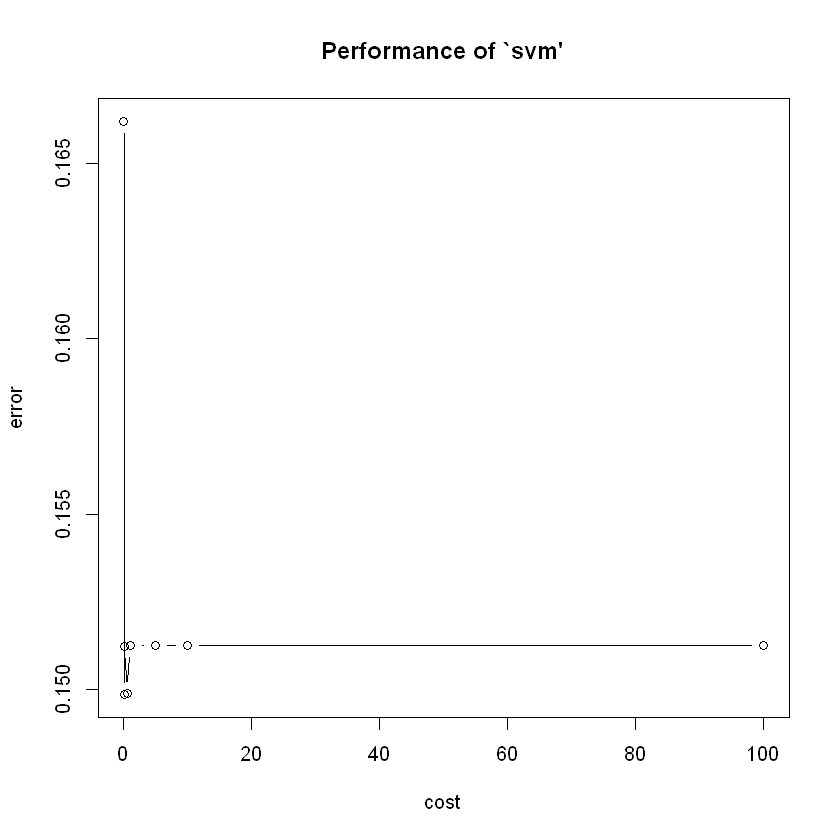


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    5   0.1

- best performance: 0.1280637 




Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    5   0.1

- best performance: 0.1280637 

- Detailed performance results:
    cost gamma     error dispersion
1  1e-03  0.01 0.4442984 0.08938420
2  1e-02  0.01 0.4442984 0.08938420
3  1e-01  0.01 0.1621066 0.04233180
4  5e-01  0.01 0.1512218 0.04853543
5  1e+00  0.01 0.1416698 0.04106957
6  5e+00  0.01 0.1444465 0.03871894
7  1e+01  0.01 0.1444280 0.03756411
8  1e+02  0.01 0.1362829 0.04863656
9  1e-03  0.10 0.4442984 0.08938420
10 1e-02  0.10 0.4415957 0.09415045
11 1e-01  0.10 0.1581451 0.04986953
12 5e-01  0.10 0.1308404 0.04049368
13 1e+00  0.10 0.1322103 0.04347634
14 5e+00  0.10 0.1280637 0.02810371
15 1e+01  0.10 0.1321548 0.03075703
16 1e+02  0.10 0.1744354 0.03689889
17 1e-03  1.00 0.4442984 0.08938420
18 1e-02  1.00 0.4442984 0.08938420
19 1e-01  1.00 0.4374861 0.09193989
20 5e-01  1.00 0.3025731 0.08624127
21 1e+00  1.00 0.2343206 0.08194611
22 5e+00  1.00 0.2261570 

[1] 0.1630435

[1] 0.04632153

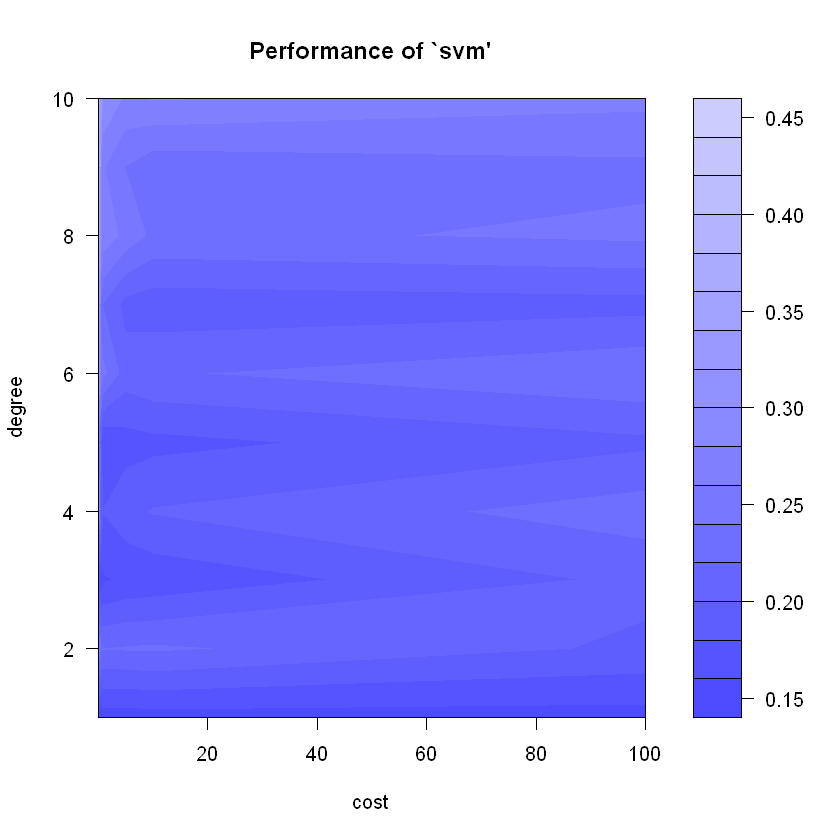

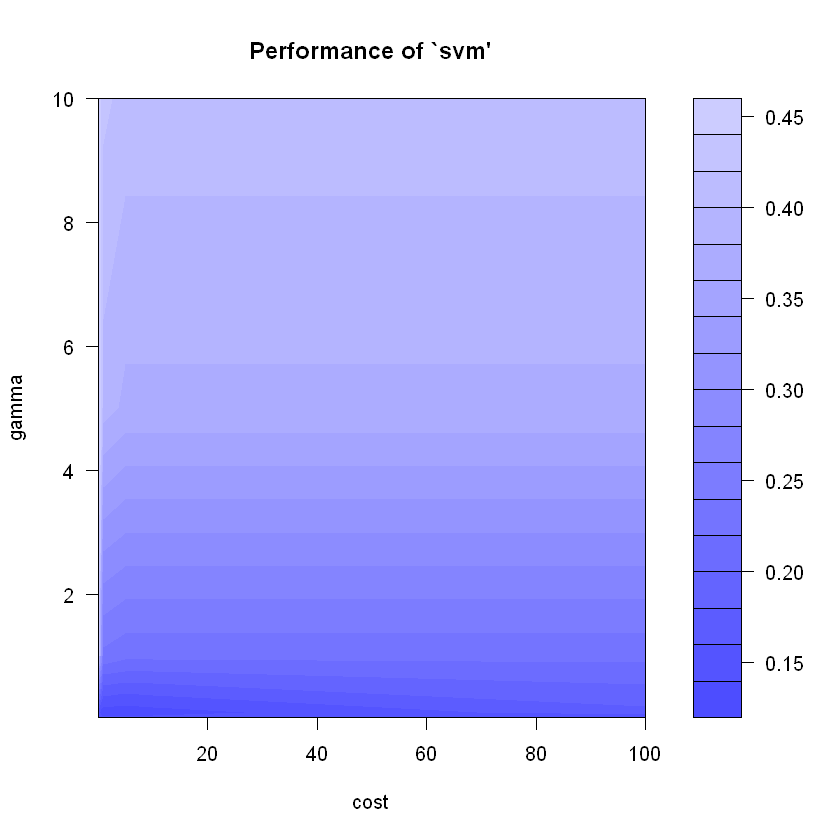

In [12]:
# linear kernel   
set.seed(1)
tune.Linear <- tune(svm,
                 HeartDisease ~ ., 
                 data = heart.train,
                 kernel="linear",
                 ranges = list(cost = c(0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100)))
print(tune.Linear)#best cost is 0.1, best performance 0.1405518 
summary(tune.Linear)
bestmod=tune.Linear$best.model
summary(bestmod)

test.pred <- predict(bestmod, heart.test) #testing error is 0.125 (mainly focus on because we will compare the test errors of the 3 kernels and choose the best kernel)
mean(heart.test$HeartDisease != test.pred) 

train.pred <- predict(bestmod, heart.train)
mean(heart.train$HeartDisease!= train.pred)  #training error is 0.1444142

plot(tune.Linear)

# polynomial kernel  
set.seed(1)
tune.poly <- tune(svm,
                      HeartDisease ~ ., 
                      data = heart.train,
                      kernel="polynomial",
                      ranges = list(cost=c(0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100), degree=c(1:10)))
print(tune.poly) # cost is 0.5, degree is 1 and best performance: 0.1471122 
summary(tune.poly) #goes through each degree and presents the results 

test.pred <- predict(tune.poly$best.model, heart.test) #testing error is 0.1195652 (error used to compare with other kernels)
mean(heart.test$HeartDisease != test.pred)

train.pred <- predict(tune.poly$best.model, heart.train) #training error is 0.1416894
mean(heart.train$HeartDisease != train.pred)

plot(tune.poly)

# radial kernel   
set.seed(1)
tune.radial <- tune(svm,
                      HeartDisease ~ ., 
                      data = heart.train,
                      kernel="radial",
                      ranges = list(cost=c(0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100), gamma=c(0.01,.1,1,5,10)))
print(tune.radial) # best parameters: cost = 5, gamma = 0.1
summary(tune.radial) 

test.pred <- predict(tune.radial$best.model, heart.test) #testing error is 0.1630435
mean(heart.test$HeartDisease != test.pred) 

train.pred <- predict(tune.radial$best.model, heart.train) #training error is 0.04632153
mean(heart.train$HeartDisease!= train.pred)

plot(tune.radial)


Upon generating the three kernels, the polynomial kernel yielded the lowest test error. However, the test error of the linear kernel and the radial kernel were not much higher than the polynomial kernel. In terms of training error, the polynomial kernel model would be the best to reliably forecast the likelihood of having a heart attack based on all the predictors in this dataset, since it contains more observations and a better representation of the error in the data set. Upon sampling training data and fitting the polynomial kernel to the model, we received a classification error - training error when fitted to entire heart data - of 0.1350763. We were unable to plot the best model on a subset of predictors, possibly due to the large number of covariates in this dataset. Since multiple features were utilized to predict the response variable, we presented a few 2D diagrams (requires two variables to visualize the decision boundary) based on the highest correlation presented - both positive and negative. 

In [13]:
#fit model to polynomial (best kernel)
set.seed(1)
tune.poly <- tune(svm,
                  HeartDisease ~ ., 
                  data = heart.train,
                  kernel="polynomial",
                  ranges = list(cost=c(0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100), degree=c(1:10)))
print(tune.poly) # cost is 0.5, degree is 1 and best performance: 0.1471122 
summary(tune.poly) 
print(tune.poly$best.parameters)
print(tune.poly$best.performance)

svmpoly_fit = svm(HeartDisease~., data = heart, 
              kernel = "polynomial", 
              cost = 0.5, degree = 1)
summary(svmpoly_fit) 
print(svmpoly_fit)

train.pred <- predict(svmpoly_fit, heart) # training error of 0.1350763
mean(heart$HeartDisease!= train.pred)



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  0.5      1

- best performance: 0.1471122 




Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  0.5      1

- best performance: 0.1471122 

- Detailed performance results:
    cost degree     error dispersion
1  1e-03      1 0.4442984 0.08938420
2  1e-02      1 0.1675491 0.03941535
3  1e-01      1 0.1498519 0.04744456
4  5e-01      1 0.1471122 0.04135239
5  1e+00      1 0.1512218 0.03919477
6  5e+00      1 0.1498889 0.04062128
7  1e+01      1 0.1512588 0.03984816
8  1e+02      1 0.1512588 0.03984816
9  1e-03      2 0.4442984 0.08938420
10 1e-02      2 0.4442984 0.08938420
11 1e-01      2 0.2766753 0.07423396
12 5e-01      2 0.2233247 0.06289288
13 1e+00      2 0.2206035 0.04787738
14 5e+00      2 0.2219919 0.03812781
15 1e+01      2 0.2233062 0.05016908
16 1e+02      2 0.1960200 0.05389960
17 1e-03      3 0.4442984 0.08938420
18 1e-02      3 0.4334136 0.09974762
19 1e-01      3 0.1689930 0.03716513
20 5e-01      3 0.1511477 0.03684242
21 1e+00      3 0.1579970 0.03264174
2

  cost degree
4  0.5      1
[1] 0.1471122



Call:
svm(formula = HeartDisease ~ ., data = heart, kernel = "polynomial", 
    cost = 0.5, degree = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.5 
     degree:  1 
     coef.0:  0 

Number of Support Vectors:  364

 ( 182 182 )


Number of Classes:  2 

Levels: 
 0 1





Call:
svm(formula = HeartDisease ~ ., data = heart, kernel = "polynomial", 
    cost = 0.5, degree = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.5 
     degree:  1 
     coef.0:  0 

Number of Support Vectors:  364



[1] 0.1350763

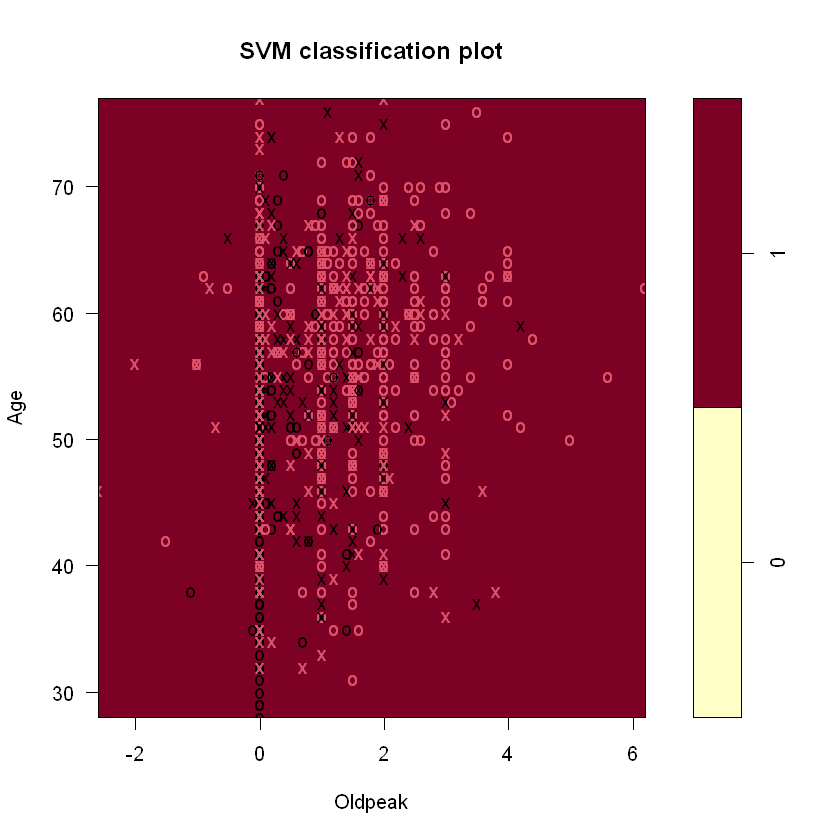

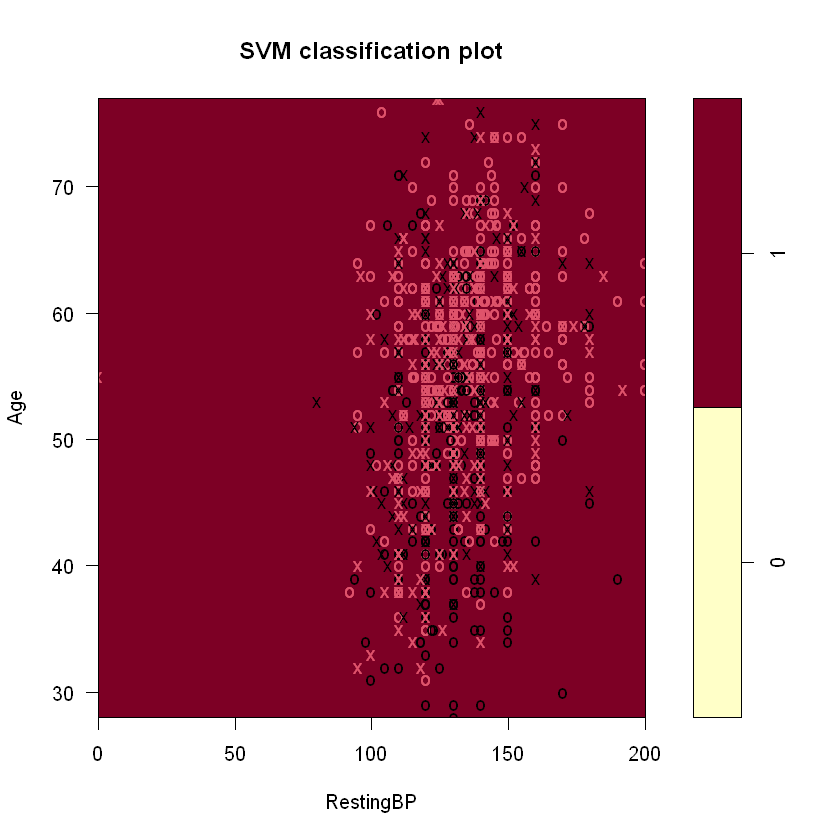

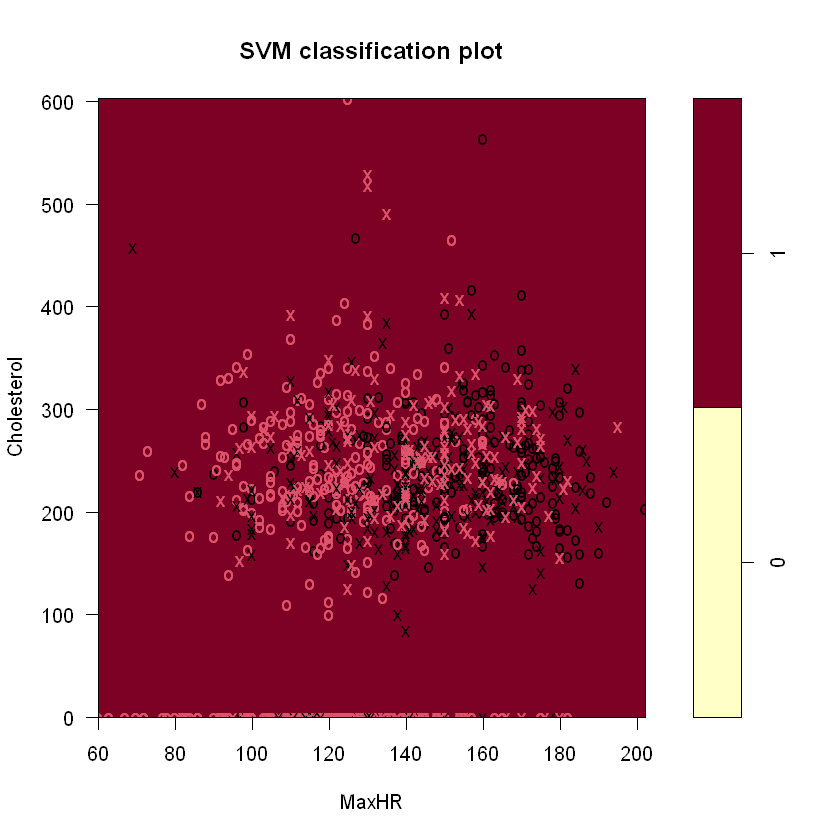

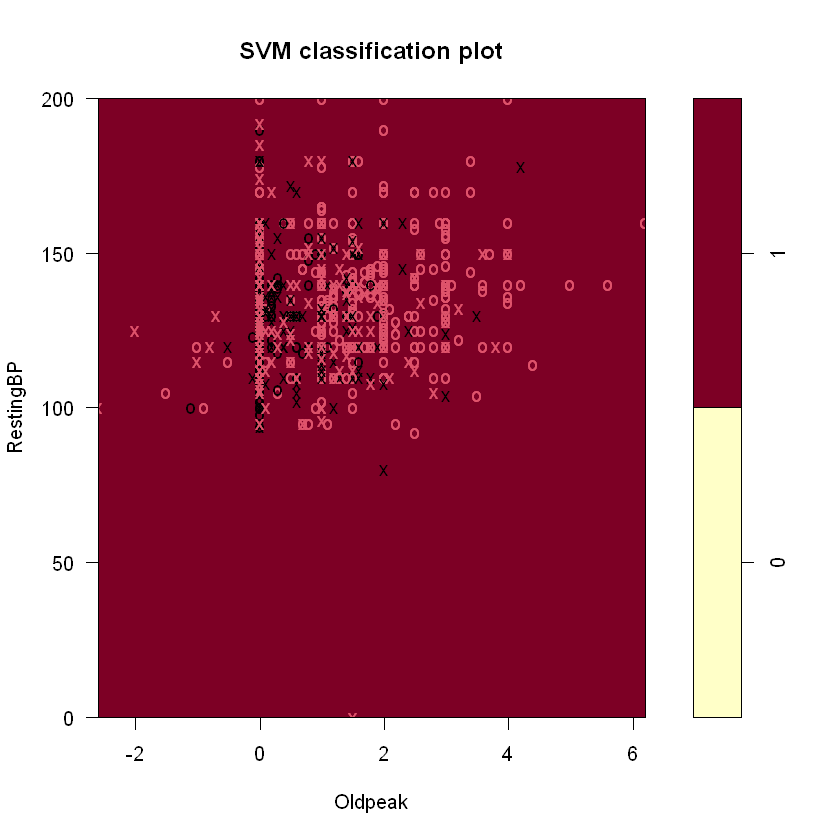

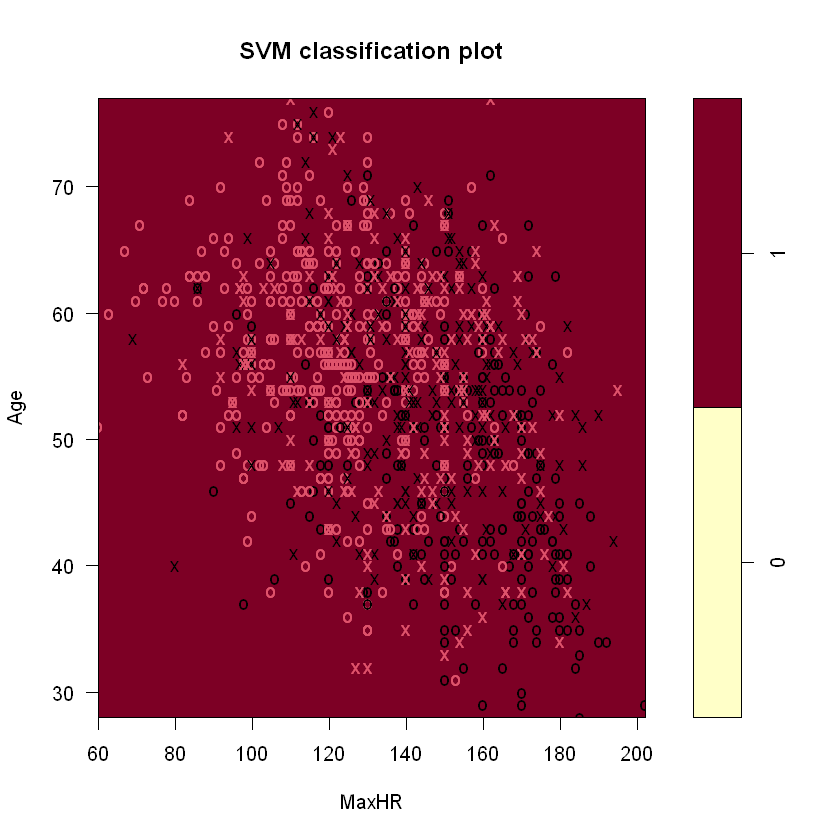

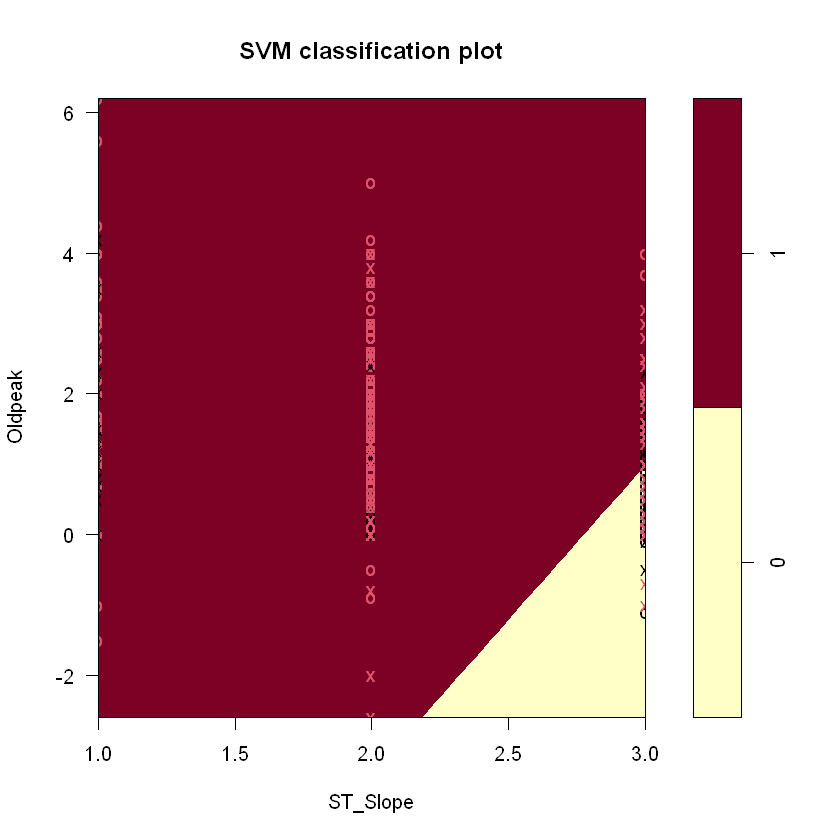

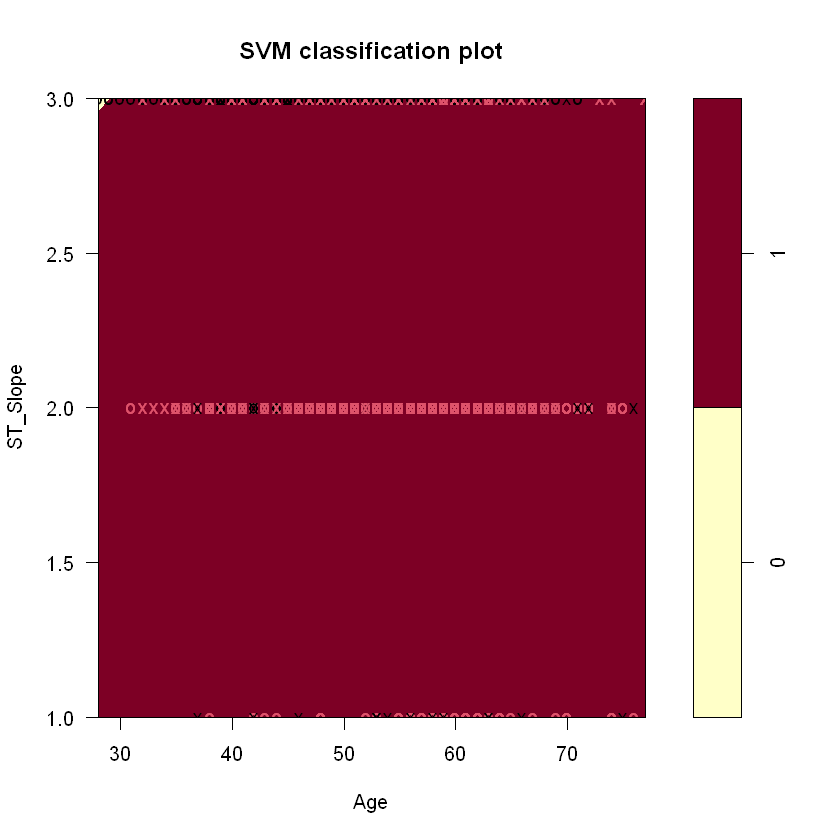

In [14]:
#Does not plot entire data at once, as we must reduce the number of covariants
#Since multiple features utilized to predict response variable, we will present a few 2D diagrams (two variables to visualize the decision boundary)
#Some positive relationship examples - blue circle
plot(svmpoly_fit,heart,Age~Oldpeak) #There is some separation (small amount), some black marks are more left skewed
plot(svmpoly_fit,heart,Age~RestingBP)
plot(svmpoly_fit,heart,Cholesterol~MaxHR) #shows a bit more separation opposed to the other positively correlated plots
plot(svmpoly_fit,heart,RestingBP~Oldpeak)

#Some negative relationship examples - warm tone (red) circles
plot(svmpoly_fit,heart,Age~MaxHR) #There is some separation, black marks are more right skewed
plot(svmpoly_fit,heart,Oldpeak~ST_Slope) #Majority looks like red mark but there are a few black marks (focus only middle)
plot(svmpoly_fit,heart,ST_Slope~Age)

# Conclusion

Conclusion:
	For our project we decided to employ supervised learning methods using the KNN and SVM algorithms. We discovered the SVM approach is better than the KNN approach in the goal of our analysis–predicting whether a person is at a higher risk of experiencing heart failure using the 11 features in the data set. We reached this conclusion upon comparing the testing error against the training error for both methods. KNN (K = 9) had a test error of 0.1016043 and training error of 0.4787962, while the polynomial kernel in the SVM method had a test error of 0.1195652, a training error of 0.1416894 (before fitting model), and error rate of 0.1350763 (after fitting model). Although the KNN technique yielded a slightly lower test error than the polynomial kernel model, this does not imply that the data was better overall. The testing error was much lower than the training error in the KNN model, meaning there is a sampling bias in our test. Using this ideology for SVM, the training error upon fitting the model and the test error acquired does not have a large disparity, in comparison to KNN. Hence, we chose SVM as a better approach.
    
For our SVM algorithm, the polynomial kernel is the best model because it yielded the lowest test error of 0.1195652; the other two kernels were not drastically different in terms of test error rates. However, for the KNN technique, the difference between training and test error was an undesirable outcome and can possibly be enhanced if we were to partition the data set differently by allowing the test set to have a slightly larger portion of the data opposed to only 20%. Furthermore, we noticed that the radial kernel model did not present bias, rather we encountered the plot being over-fitted - due to its test error (0.1630435) being significantly higher than its training error (0.04632153). This occurs when a function is too closely aligned to a limited set of data points; perhaps the model is memorizing the data it has seen and is unable to generalize to unseen examples

To answer the fundamental question, it appears that the predictors from the Heart Failure dataset enable us to predict whether or not an individual will get heart disease/failure (using Polynomial kernel function of SVM). However, based on a small dataset used, we will encounter bias and considering it impacts the internal validity of an analysis by leading to erroneous estimation of variable relationships, we believe the predictions may not be entirely reliable (considering heart failure is a serious health condition). An approach we could’ve taken is properly scaling our qualitative data rather than converting them to a quantitative value. Moreover, the resolution to both of these difficulties (Polynomial kernel in SVM and KNN) is to potentially alter the predictors that are being used to assess the data.
